In [1]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import pandas as pd
import numpy as np

import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
from rpy2.robjects import r
#should work automatically i.e. no need for: df_long_r = pandas2ri.py2ri(df_long)
from rpy2.robjects import pandas2ri
pandas2ri.activate()
%load_ext rpy2.ipython

matplotlib.style.use('seaborn-notebook')
matplotlib.style.use('seaborn-ticks')



To be completed

In [3]:
import io

#df = pd.read_clipboard()
#http://lib.stat.cmu.edu/DASL/Stories/AlcoholandTobacco.html
s = """
Region	Alcohol	Tobacco
North	6.47	4.03
Yorkshire	6.13	3.76
Northeast	6.19	3.77
East Midlands	4.89	3.34
West Midlands	5.63	3.47
East Anglia	4.52	2.92
Southeast	5.89	3.20
Southwest	4.79	2.71
Wales	5.27	3.53
Scotland	6.08	4.51
Northern Ireland	4.02	4.56
"""
df = pd.read_table(io.StringIO(s))

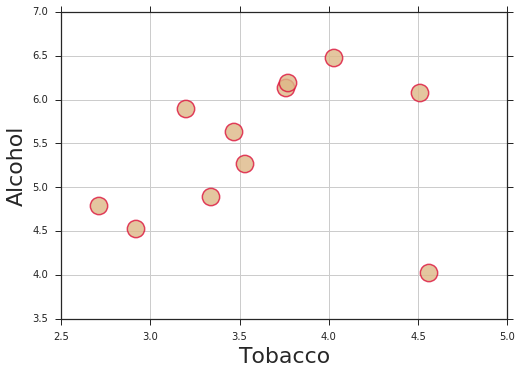

In [6]:
plt.scatter('Tobacco', 'Alcohol', data=df, marker='o', alpha=.8,
            s=300, c='burlywood', edgecolors='crimson', lw=1.5)
plt.grid()
plt.ylabel('Alcohol', fontsize=22)
plt.xlabel('Tobacco', fontsize=22)

When using pandas you are missing Tab-Shift helpfull hints, but you gain few powerful options among which **yerr** and **xerr**, and **table**.

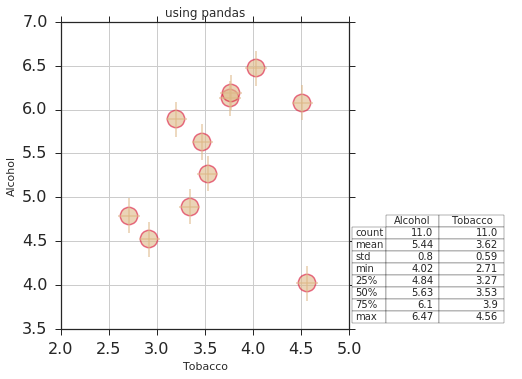

In [7]:
ax1 = plt.subplot2grid((1,3), (0,0), colspan=2)
ax2 = plt.subplot2grid((1,3), (0,2), colspan=1)
ax2.set_axis_off()

g = df.plot(ax=ax1, kind='scatter', x='Tobacco', y='Alcohol', fontsize=16,
        s=300, marker='o', c='burlywood', edgecolors='crimson', lw=1.5, 
        alpha=.6, grid=True, title='using pandas',
        yerr=.2, xerr=.11)

tb = pd.tools.plotting.table(ax=ax2,data=np.round(df.describe(), 2), loc=4, colWidths=[0.4, 0.5, 0.5])

## linear fit using statsmodels

In [5]:
df['ones'] = np.ones(len(df))
df

,Region,Alcohol,Tobacco,ones
0,North,6.47,4.03,1
1,Yorkshire,6.13,3.76,1
2,Northeast,6.19,3.77,1
3,East Midlands,4.89,3.34,1
4,West Midlands,5.63,3.47,1
5,East Anglia,4.52,2.92,1
6,Southeast,5.89,3.20,1
7,Southwest,4.79,2.71,1
8,Wales,5.27,3.53,1
9,Scotland,6.08,4.51,1


In [27]:
import statsmodels.formula.api as sm

# removing the outlier
y = df.Alcohol[:-1]
x = df[['ones', 'Tobacco']][:-1]
#x = df.Tobacco[:-1]
#res = sm.OLS(y, x, hasconst=1).fit()
res = sm.OLS(y, x).fit()
res.summary()

/home/dan/.venvs/pelican/lib/python3.5/site-packages/scipy/stats/stats.py:1285: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Alcohol   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     12.78
Date:                Sun, 01 Nov 2015   Prob (F-statistic):            0.00723
Time:                        13:00:54   Log-Likelihood:                -4.9998
No. Observations:                  10   AIC:                             14.00
Df Residuals:                       8   BIC:                             14.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
ones           2.0412      1.001      2.038      0.076        -0.268     4.350
Tobacco        1.0059      0.281      3.576      0.007         0.357     1.655
==============================================================================
Omnibus:                        2.542   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.281   Jarque-Bera (JB):                0.904
Skew:                          -0.014   Prob(JB):                        0.636
Kurtosis:                       1.527   Cond. No.                         27.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
from statsmodels.formula.api import ols

lmout = ols('Alcohol ~ Tobacco', df[:-1]).fit()
lmout.summary()

/home/dan/.venvs/pelican/lib/python3.5/site-packages/scipy/stats/stats.py:1285: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Alcohol   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     12.78
Date:                Sun, 01 Nov 2015   Prob (F-statistic):            0.00723
Time:                        13:03:00   Log-Likelihood:                -4.9998
No. Observations:                  10   AIC:                             14.00
Df Residuals:                       8   BIC:                             14.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.0412      1.001      2.038      0.076        -0.268     4.350
Tobacco        1.0059      0.281      3.576      0.007         0.357     1.655
==============================================================================
Omnibus:                        2.542   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.281   Jarque-Bera (JB):                0.904
Skew:                          -0.014   Prob(JB):                        0.636
Kurtosis:                       1.527   Cond. No.                         27.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

For a detailed explanation of these results look [here](http://connor-johnson.com/2014/02/18/linear-regression-with-python/).

## Linear fit using sklearn

In [7]:
from sklearn.linear_model import LinearRegression

/home/dan/.venvs/pelican/lib/python3.5/site-packages/sklearn/utils/fixes.py:64: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if 'order' in inspect.getargspec(np.copy)[0]:


In [8]:
y = np.matrix(df)[:,1]
x = np.matrix(df)[:,2]

In [9]:
clean = LinearRegression()
total = LinearRegression()
clean.fit(x[:-1], y[:-1])
total.fit(x, y)
clean.score(x[:-1], y[:-1]), total.score(x, y)

(0.61510660055413524, 0.049984490275868487)

In [10]:
clean_score = '{0:.3f}'.format( clean.score( x[:-1], y[:-1] ) )
original_score = '{0:.3f}'.format( total.score( x, y ) )

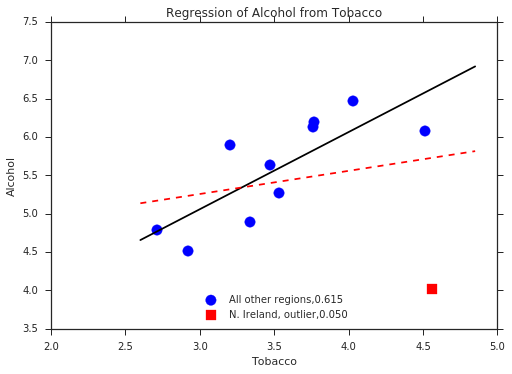

In [11]:
#plt.scatter( df.Tobacco[:-1], df.Alcohol[:-1],
#         marker='o', facecolors='none', edgecolors='b', s=110,
#         label='All other regions,' +clean_score )
df[:-1].plot(kind='scatter', x='Tobacco', y='Alcohol',
             marker='o', facecolors='none', edgecolors='b', s=110,
             label='All other regions,' +clean_score,
             title='Regression of Alcohol from Tobacco')

plt.scatter( df.Tobacco[-1:], df.Alcohol[-1:],
         marker='s', color='r', s=110,
         label='N. Ireland, outlier,' +original_score )
plt.legend(loc='lower center')

test = np.linspace(2.6, 4.85, 20)
test = np.array(np.matrix(test).T)

plt.plot(test, clean.predict(test), 'k-')
plt.plot(test, total.predict(test), 'r--')

In [12]:
import scipy.stats
scipy.stats.linregress(df.Tobacco[:-1], df.Alcohol[:-1])

LinregressResult(slope=1.0058958323387601, intercept=2.0412230868382095, rvalue=0.78428732015386771, pvalue=0.007234358351729496, stderr=0.28132158350454362)

## Trellis plot: ggplot vs. seaborn

In [13]:
df0 = df[['Region', 'Alcohol', 'Tobacco']]
df_long = pd.melt(df0, id_vars='Region')

/home/dan/.venvs/pelican/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


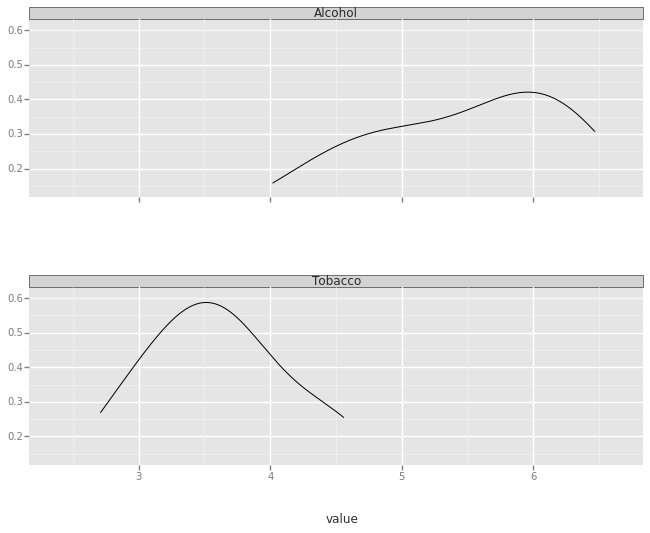

<ggplot: (8776660704113)>


In [14]:
from ggplot import *

print( ggplot(df_long, aes(x='value')) + 
      geom_density() + facet_grid('variable')
)

In [8]:
import seaborn as sb
g = sb.(df_long, row="variable", hue='variable')
g.map(sb.kdeplot, "value")

SyntaxError: invalid syntax (<ipython-input-8-1f2984efbc7f>, line 2)

## and rpy2

It is probably going through active development with continuosly changing best practices. However, I found two pricipal methods for using it.

### method 1: sending variables to R (globalenv)

In [16]:
robjects.globalenv['df'] = df
robjects.globalenv['df_long'] = df_long

In [17]:
'''
    %R plot(df)

    r(""" plot(df) """)
'''

'\n    %R plot(df)\n\n    r(""" plot(df) """)\n'

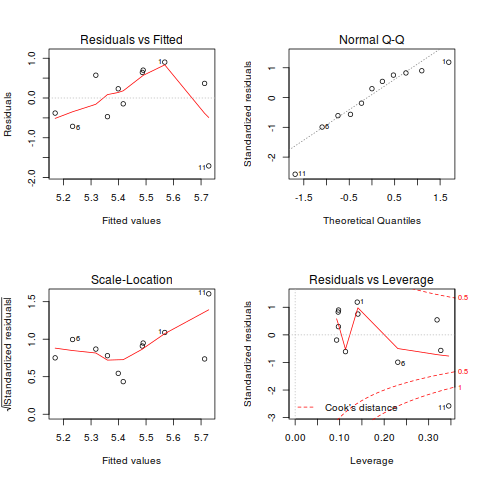

In [18]:
%%R
lm = lm(df$Alcohol ~ df$Tobacco)
par(mfrow=c(2,2))
plot(lm)

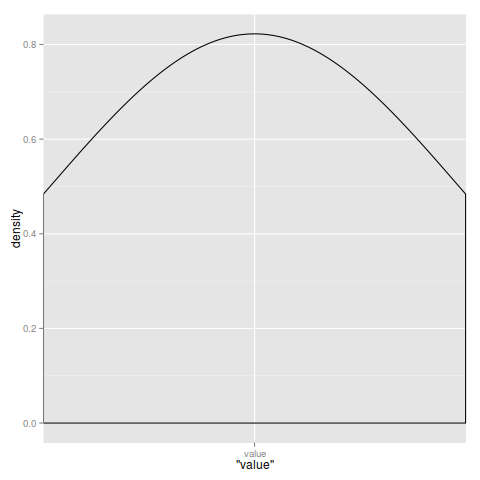

In [19]:
%%R
library(ggplot2)
ggplot(df_long, aes(x='value')) + geom_density()

### method 2: pythonic

In [21]:
gr = importr('grDevices')
stats = importr('stats')
graphics = importr('graphics')
base = importr('base')
lm = stats.lm('Alcohol ~ Tobacco', data=df)
gr
graphics.par(mfrow=base.c(2,2))
graphics.plot(lm)
#r['plot'](lm) #as a nice alternative
input()
gr.dev_off()

<IntVector - Python:0x7fdd94ea7cc8 / R:0x718aa78>
[       1]

In [27]:
import rpy2.robjects.lib.ggplot2 as ggplot2
#gplot2 = importr('ggplot2')
gr
pp = ggplot2.ggplot(df) + ggplot2.geom_point(ggplot2.aes(x='Alcohol', y='Tobacco'))
#pp = ggplot2.gplot(df) + ggplot2.aes(x='Tobacco') + ggplot2.geom_density()
print(pp)
input()
gr.dev_off()

RRuntimeError: Error in FUN(X[[i]], ...) : Unknown input:expression


In [37]:
gr.dev_off()

<IntVector - Python:0x7fae6a0da808 / R:0x3959e58>
[       1]

In [21]:
r('lmout <- lm(df$Alcohol ~ df$Tobacco)')

<ListVector - Python:0x7fb798b4ea48 / R:0x710f578>
[Float..., Array, Array, ..., Vector, Formula, DataF...]
  coefficients: <class 'rpy2.robjects.vectors.FloatVector'>
  <FloatVector - Python:0x7fb798b79fc8 / R:0x7081ef0>
[4.351168, 0.301938]
  residuals: <class 'rpy2.robjects.vectors.Array'>
  <Array - Python:0x7fb798bcb488 / R:0x71804b8>
[0.902020, 0.643543, 0.700524, ..., -0.147011, 0.367090, -1.708007]
  effects: <class 'rpy2.robjects.vectors.Array'>
  <Array - Python:0x7fb798b5b508 / R:0x7180608>
[-18.054499, -0.564016, 0.478753, ..., -0.314300, -0.022665, -2.109112]
  ...
  coefficients: <class 'rpy2.robjects.vectors.Vector'>
  <Vector - Python:0x7fb798b5aa48 / R:0x7049b50>
[RNULLType, Vector]
  residuals: <class 'rpy2.robjects.Formula'>
  <Formula - Python:0x7fb799324748 / R:0x700d330>
<ListVector - Python:0x7fb798b4ea48 / R:0x710f578>
[Float..., Array, Array, ..., Vector, Formula, DataF...]

In [25]:
 
def my_linear_fit_using_r(X,Y,verbose=True):
   # ## FITTINGS:   RPy implementation ###
   r_correlation = robjects.r('function(x,y) cor.test(x,y)')
   # r_quadfit = robjects.r('function(x,y) lm(y~I(x)+I(x^2))')
   r_linfit = robjects.r('function(x,y) lm(y~x)')
   r_get_r2=robjects.r('function(x) summary(x)$r.squared')
   lin=r_linfit(robjects.FloatVector(X),robjects.FloatVector(Y))
   coef_lin=robjects.r.coef(lin)
   a=coef_lin[0]
   b=coef_lin[1]
   r2=r_get_r2(lin)
   ci=robjects.r.confint(lin) # confidence intervals
   lwr_a=ci[0]
   lwr_b=ci[1]
   upr_a=ci[2]
   upr_b=ci[3]
   if verbose:
      print(robjects.r.summary(lin))
      # print robjects.r.summary(quad)
   return (a,b,r2[0],lwr_a,upr_a,lwr_b,upr_b)

In [4]:
linear_model = rpy2.r.lm(rpy.r("y ~ x1"), data = rpy2.r.data_frame(x1=x1,y=y))

	    rpy.set_default_mode(rpy.BASIC_CONVERSION)
	    print linear_model.as_py()['coefficients']
	    summary = rpy.r.summary(linear_model)
	    print summary

AttributeError: module 'rpy2' has no attribute 'r'